# GROSS RENT EDA

In this notebook an EDA on the number of renter-housing by range of gross rent. This EDA is focused on knowing how the gross rent has changed over time in the selected US-States, and comparing the average of the median gross rent to the average income of people who has earned a bachelor degree or above.

**Gross rent** is the monthly amount of rent plus the estimated average monthly cost of utilities (electricity, gas, water and sewer) and fuels (oil, coal, kerosene, wood, etc.) ([census.gov](https://www.census.gov/data/tables/time-series/dec/coh-grossrents.html#:~:text=Both%20gross%20rents%20adjusted%20and,%2C%20wood%2C%20etc.))

## Importing python modules

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import connectheroku
import matplotlib.pyplot as plt
from matplotlib import markers

In [150]:
sns.set_style('whitegrid')
all_shapes = list(markers.MarkerStyle.markers.keys())

## Importing credential to connect to Heroku Database

This part can be substituted reading the file gross_rent.csv available on [link](https://github.com/aliglara/capstone-c1-DA/tree/main/data)

In [151]:
credential_path = '/Users/aliglara/Documents/MyGit/apis/credential_keys.json'
cursor = connectheroku.connect_database("c1_capstone", credential_path)

# Grabbing the information required for the EDA

From the homeless population EDA, the states selected for further EDA were:

In [152]:
list_states = ['NY', 'OR', 'CA', 'WA', 'MA', 'CO', 'FL', 'AZ', 'PA', 'GA']

Reading database

In [153]:
query = ("SELECT * FROM gross_rent "
         "WHERE name_state IN "
         "   (SELECT sr.name "
         "    FROM state_region AS sr "
         "    WHERE abbreviation IN ('" + "','".join(list_states)  + "'))")

In [154]:
cursor.execute(query)
results = cursor.fetchall()

Converting the SQL query in to a DataFrame, it should be looked like importing the csv file to Excel

In [155]:
column_names = [i[0] for i in cursor.description]
df = pd.DataFrame(results, columns=column_names)

In [156]:
df = df.drop("id", axis=1)

In [157]:
df.rename({
    'year': 'Year',
    'name_state': 'State name',
    'less_than_100': 'Less than 100',
    'r100_to_r149' : '100 to 149',
    'r150_to_r199' : '150 to 199',
    'r200_to_r249' : '200 to 249',
    'r250_to_r299' : '250 to 299',
    'r300_to_r349' : '300 to 349',
    'r350_to_r399' : '350 to 399',
    'r400_to_r449' : '400 to 449',
    'r450_to_r499' : '450 to 449',
    'r500_to_r549' : '500 to 549',
    'r550_to_r599' : '550 to 599',
    'r600_to_r649' : '600 to 649',
    'r650_to_r699' : '650 to 699',
    'r700_to_r749' : '700 to 749',
    'r750_to_r799' : '750 to 799',
    'r800_to_r899' : '800 to 899',
    'r900_to_r999' : '900 to 999',
    'r1000_to_r1249' : '1000 to 1249',
    'r1250_to_r1499' : '1250 to 1499',
    'r1500_to_r1999' : '1500 to 1999',
    'r2000_to_r2499' : '2000 to 2499',
    'r2500_to_r2999' : '2500 to 2999',
    'r3000_to_r3499' : '3000 to 3499',
    'r3500_to_more' : '3500 to more'
}, axis='columns', inplace=True)

Visualizing the dataset

In [158]:
df.head()

,Year,State name,Less than 100,100 to 149,150 to 199,200 to 249,250 to 299,300 to 349,350 to 399,400 to 449,...,800 to 899,900 to 999,1000 to 1249,1250 to 1499,1500 to 1999,2000 to 2499,2500 to 2999,3000 to 3499,3500 to more,id_state
0,2015,New York,7166,10928,19334,75748,61802,51727,50293,52649,...,200690,207601,518411,442533,546433,229092,117541,72060,65347,36
1,2015,Oregon,1217,1764,4135,8490,5652,5137,5589,9448,...,68147,65774,113914,60251,53955,14396,4407,2519,1667,41
2,2015,Pennsylvania,6287,5890,13157,37594,23202,23559,25876,30124,...,168008,138817,250469,128872,105281,32832,10929,5683,4507,42
3,2015,Washington,2662,3985,5918,16466,9906,9940,11834,11794,...,84372,90124,178693,143812,151320,47381,15203,7876,5219,53
4,2015,Arizona,1915,1696,3570,6579,6064,6695,7442,14931,...,101873,92438,181634,104236,69295,16934,5765,3168,1794,4


Let's verify we are working with the selected US-States

In [159]:
df["State name"].unique()

array(['New York', 'Oregon', 'Pennsylvania', 'Washington', 'Arizona',
       'California', 'Colorado', 'Florida', 'Georgia', 'Massachusetts'],
      dtype=object)

Let's verify we are working in the period 2015:2020

In [160]:
df["Year"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020])

Let's save this information in varaibles for further analysis

In [161]:
states = list(df["State name"].unique())
years = list(df["Year"].unique())

We can create a pivot table in Excel grouping by Year and State. In this notebook, the id_state is taken because its ease to use

In [162]:
df = df.sort_values(by=["Year", "State name"])
df.set_index(["Year", "State name"], inplace=True)

In [163]:
df

Less than 100  100 to 149  150 to 199  200 to 249  \
Year State name                                                         
2015 Arizona                 1915        1696        3570        6579   
     California              8966        9636       14664       39713   
     Colorado                2594        2570        3090       11771   
     Florida                 3166        4898       13553       25641   
     Georgia                 1383        3167        8789       17889   
     Massachusetts           5941        5641        7505       22932   
     New York                7166       10928       19334       75748   
     Oregon                  1217        1764        4135        8490   
     Pennsylvania            6287        5890       13157       37594   
     Washington              2662        3985        5918       16466   
2016 Arizona                 2241        1892        3955        8389   
     California             13093        7938       12554       34644   
     Colorado                2330        1910        3090        8790   
     Florida                 3622        5089       14625       24276   
     Georgia                 3120        4197        9482       16273   
     Massachusetts           3937        4729        8977       25135   
     New York                6276        7381       18429       77562   
     Oregon                   664        1031        3817        7797   
     Pennsylvania            6186        5961       11958       32349   
     Washington              1489        2618        4436       15965   
2017 Arizona                 2447        2117        2679        7428   
     California              9168        8297       13556       32030   
     Colorado                2282        1066        2434       11746   
     Florida                 3147        4933       11812       27775   
     Georgia                 1812        5065        8930       19038   
     Massachusetts           4768        6282        6178       24233   
     New York                5600        8020       18055       85064   
     Oregon                   646        1392        3093        6775   
     Pennsylvania            8196        5043       11055       38412   
     Washington              2802        1943        5535       15128   
2018 Arizona                 1169         642        2060        8809   
     California              9375        6599       10145       32886   
     Colorado                3147        1431        3413       10885   
     Florida                 3190        3079       12705       23588   
     Georgia                 3567        3927        9005       14968   
     Massachusetts           4878        5708        5948       19070   
     New York                4850        9061       17679       77901   
     Oregon                  1109        1250        2687        9319   
     Pennsylvania            7591        5930       10086       31316   
     Washington              2229        1360        5107       12852   
2019 Arizona                  958        1780        4295        8883   
     California              8841        9856       10284       25581   
     Colorado                1933        1083        2021        9015   
     Florida                 2594        2845        9914       28478   
     Georgia                 1980        3820        6402       17147   
     Massachusetts           2857        5237        6844       18257   
     New York                4710       10406       18684       69770   
     Oregon                  1066         993        3816        7464   
     Pennsylvania            6809        6357       10125       33604   
     Washington              2617         939        7198       16305   
2020 Arizona                 1515        1573        2698        7045   
     California              9376        7595       10155       22394   
     Colorado                1909        1272        1863        8600   
     

As a reminder, this dataset contains the number of renter-housing units for range of gross rent by state. Therefore, it is possible to show how the number of units has changed over time using a barplot.

# Visualiation distribution of renter housing units

A Barplot is requiered a categorical variable on the x-axis, in our case, gross rent prices range. On the y-axis, a numerical value is needed which it will be the number of housing units.

The next figure shows a set of 6 barplots (one for each year) for each state.

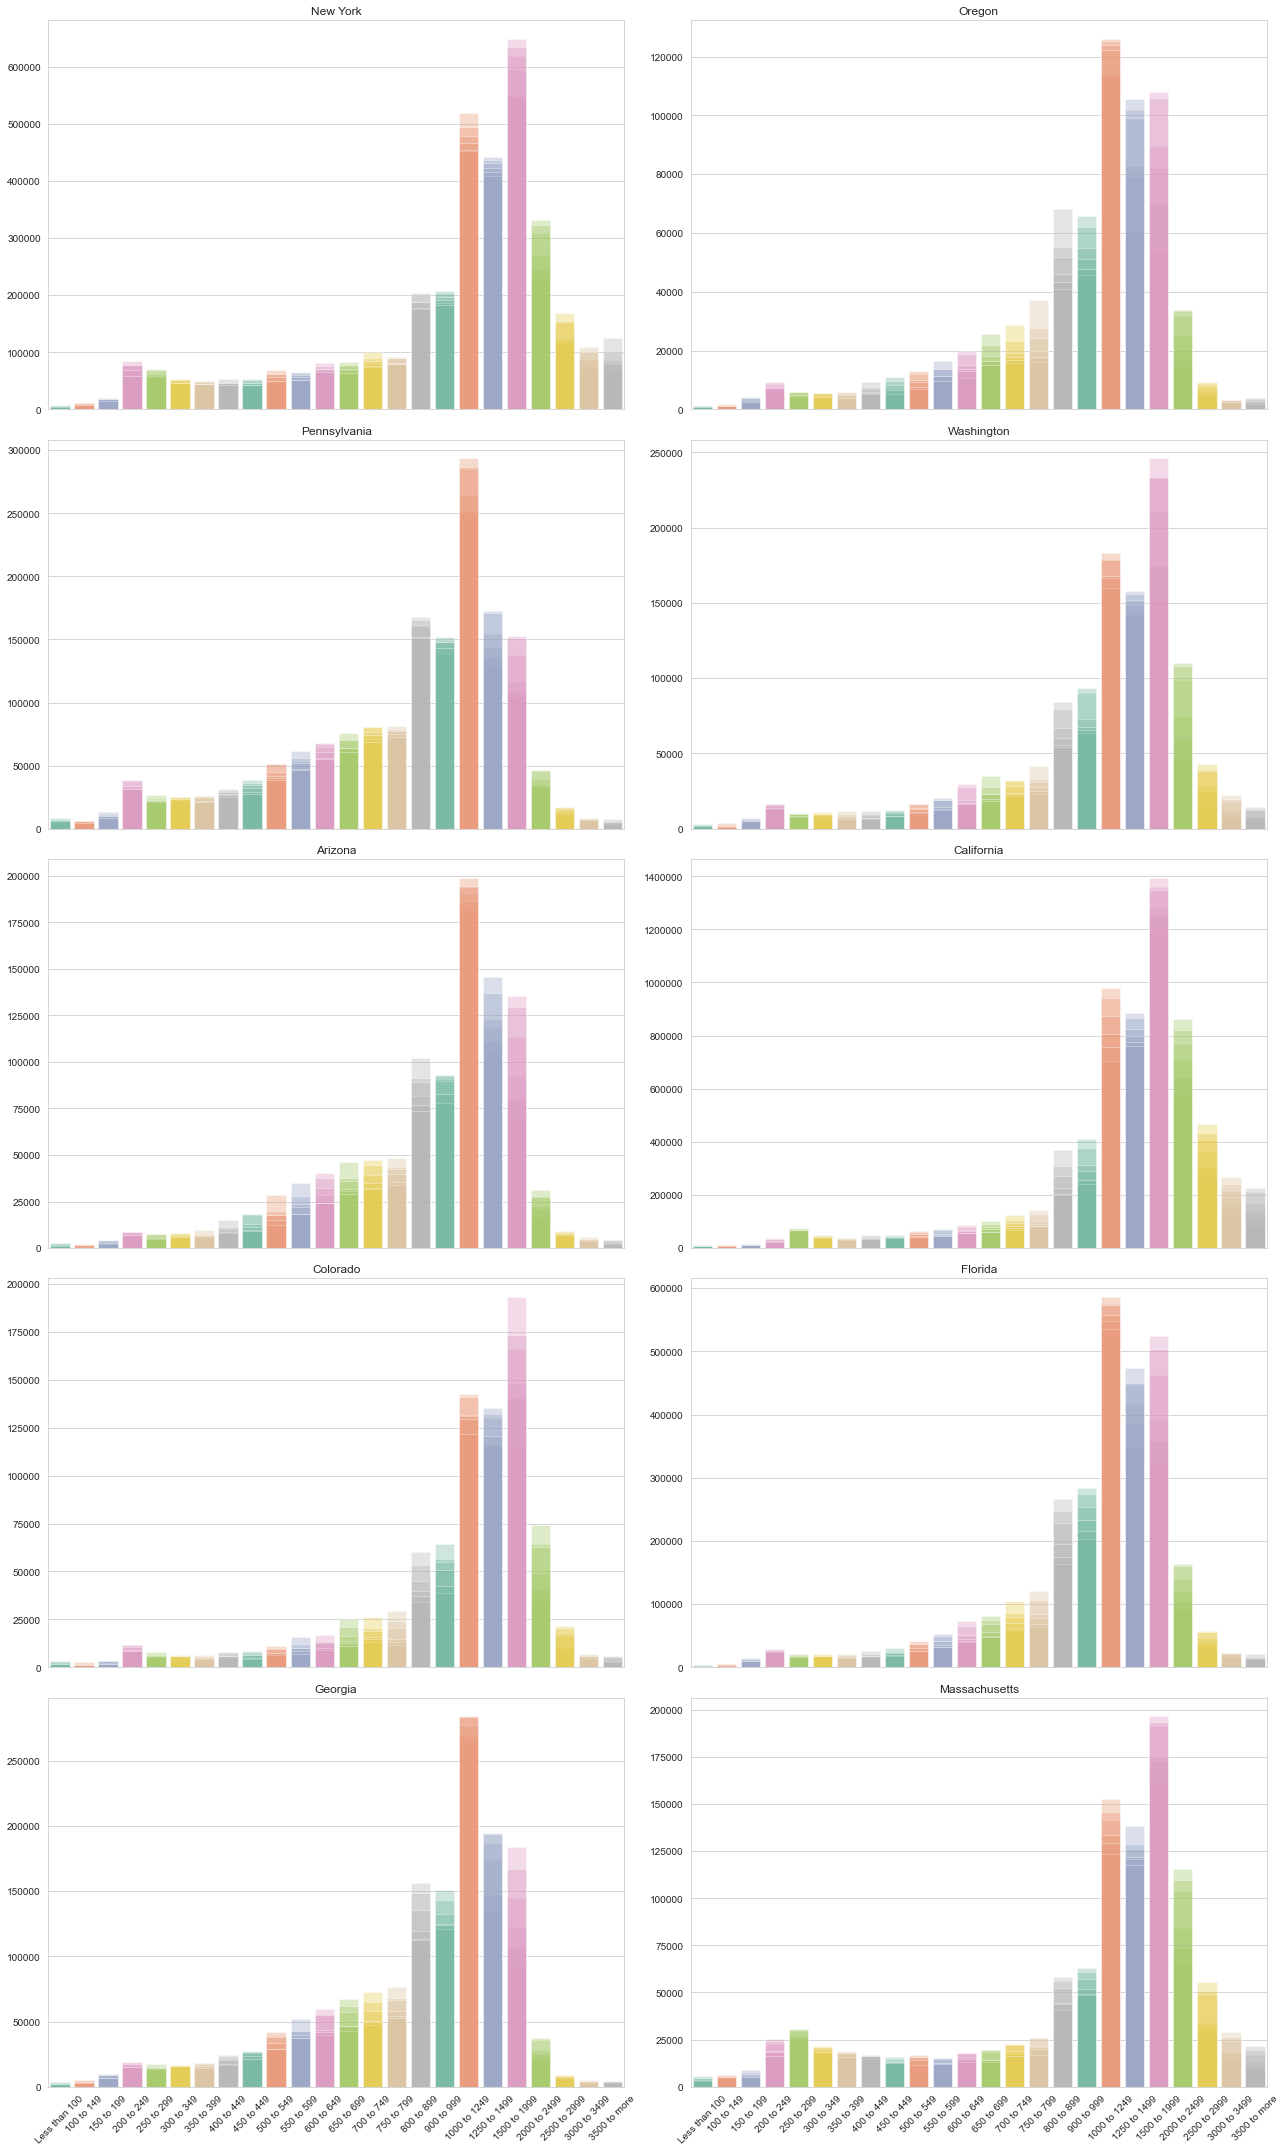

In [164]:
# Create the figure
_, axes = plt.subplots(5, 2, figsize=(18,30), sharex='col')

for state, ax in zip(states, axes.ravel()):
    # The data has to be reformated for the barplot seaborn
    subdata = df.loc(axis=0)[:, state]
    subdata.reset_index(inplace=True)
    subdata = subdata.drop(["id_state", "State name"], axis=1)
    subdata = subdata.T
    subdata.columns = subdata.iloc[0]
    subdata = subdata.drop("Year", axis=0)
    
    for year in years:
        g = sns.barplot(x=subdata.index, y=subdata[year].values,
                        palette = 'Set2',
                        ax=ax, alpha=0.35)
        g.set_title(state)
        g.tick_params(labelrotation=45, axis='x')
        g.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()
    

Based on the picture, the most of the renter housing units are in the range of $750 to $2500. However, it is difficult to observe if the number of units has changed over time.
Let's plot a cumulative distribution by state by year

In [165]:
df.reset_index(inplace=True)

In [166]:
df1 = df.drop("id_state", axis=1)

In [167]:
df1 = df1.iloc[:,2:].apply(lambda x: x/x.sum()*100, axis=1)

In [168]:
df1 = df1.apply(lambda x: np.cumsum(x), axis=1)

In [169]:
df1 = pd.concat([df[["Year","State name"]], df1], axis=1)

In [170]:
df1.set_index(["Year", "State name"], inplace=True)

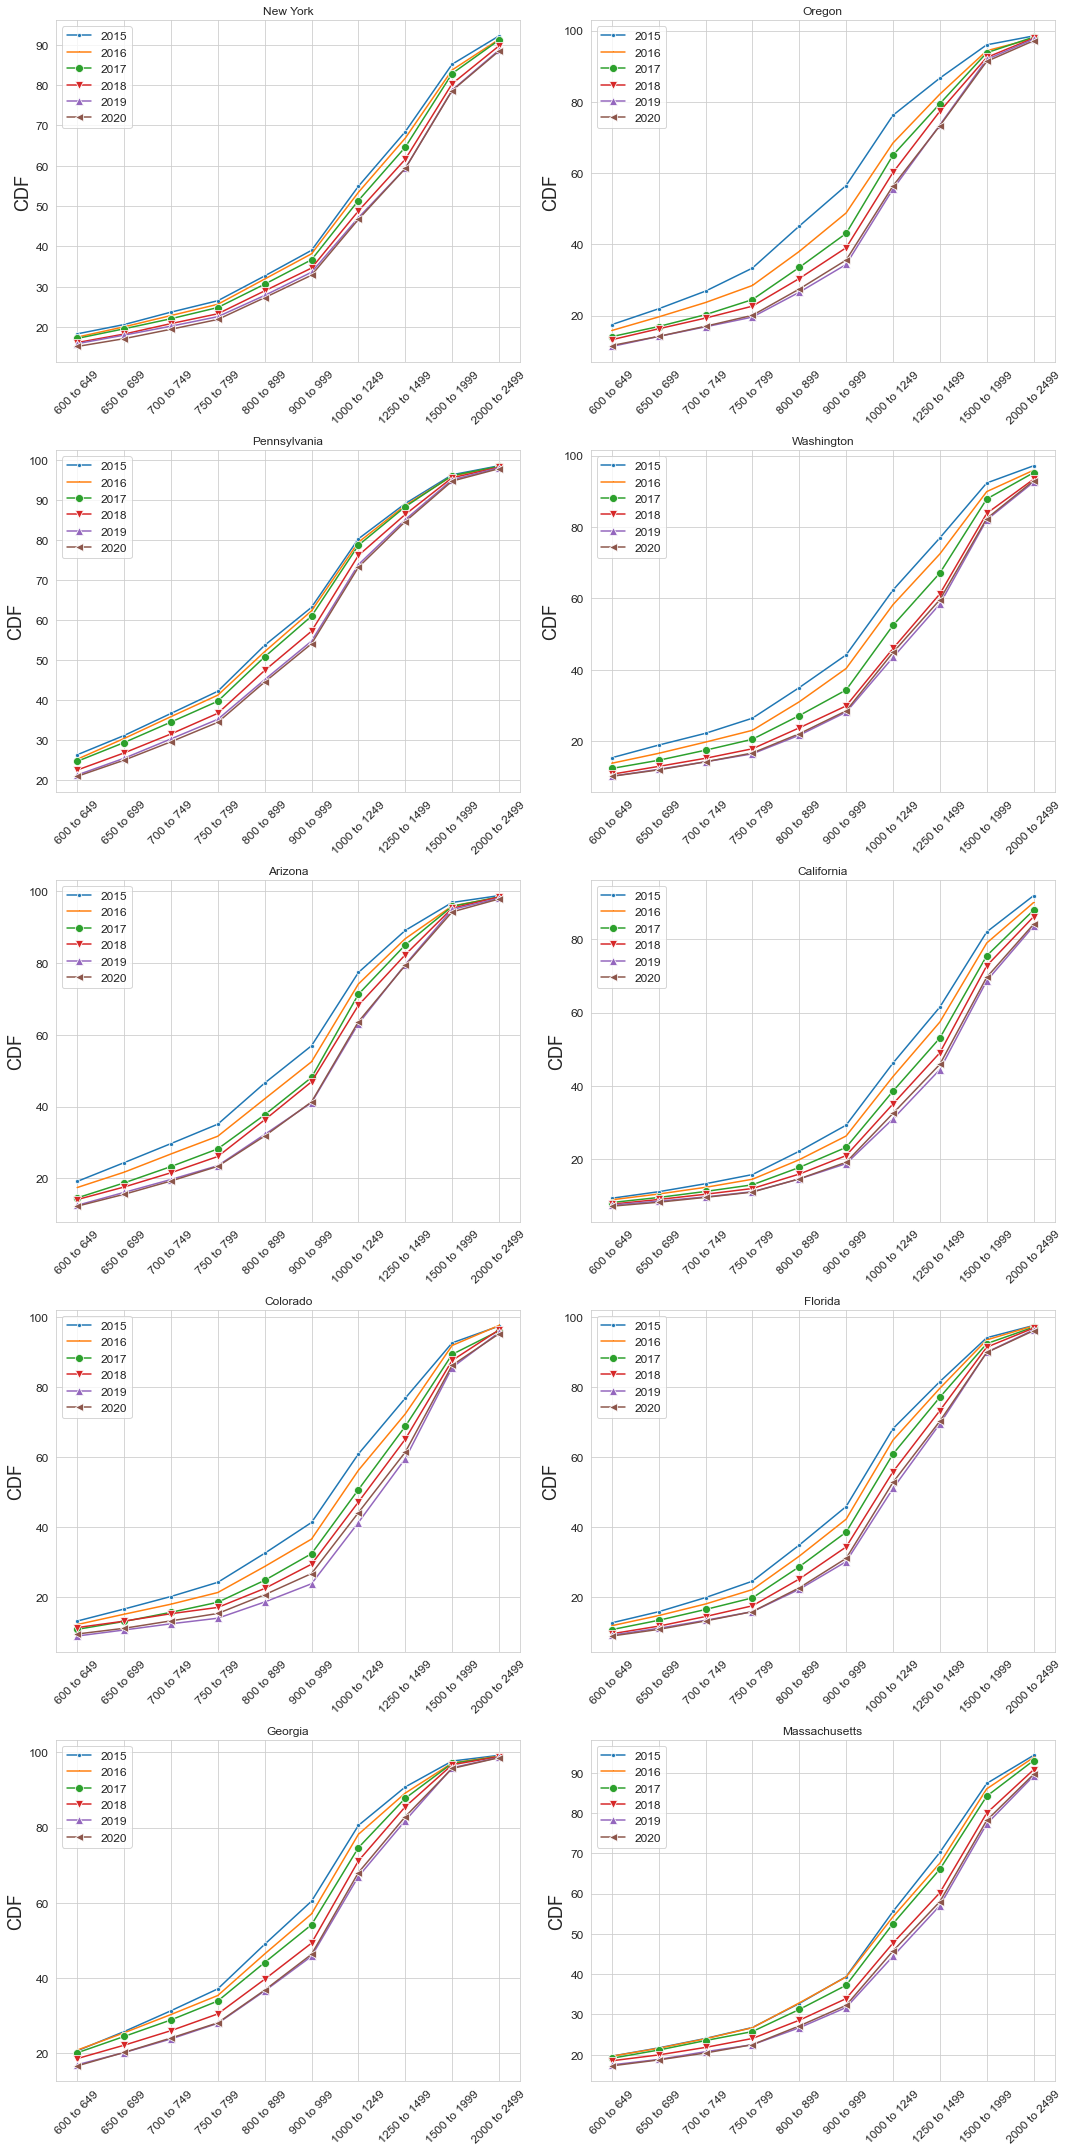

In [171]:
_, axes = plt.subplots(5, 2, figsize=(15,30))

for state, ax in zip(states, axes.ravel()):
    for i, year in enumerate(years):
        g = sns.lineplot(data=df1.loc[(year, state)][11:-3],
                         palette='colorblind', ax=ax, label=year,
                         marker=all_shapes[i],
                         markersize=8)
        g.set_title(state)
        g.set_ylabel("CDF", fontsize=18)
        g.tick_params(axis='y', labelsize=12)
        g.tick_params(labelrotation=45, axis='x', labelsize=12)
        g.ticklabel_format(style='plain', axis='y')
        g.legend(fontsize='large')

plt.tight_layout()
plt.show()


It is interesting that in all the states the number of renter housing units has decreased since 2015. However, the number of units during the last 4 years has been kept almost the same.